<a href="https://colab.research.google.com/github/2015pushkar/Swiggy-Data-Analysis/blob/main/Swiggy_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

In [ ]:
%cd /content/gdrive/MyDrive/Kaggle

/content/gdrive/MyDrive/Kaggle


In [ ]:
!kaggle datasets download -d sabinhashmi/swiggy-bangalore-delivery-outlet-data

swiggy-bangalore-delivery-outlet-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  nba-players-data.zip
replace all_seasons.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Swiggy Bangalore Outlet Details.csv
error:  invalid response [Swiggy Ba]
replace all_seasons.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
Archive:  swiggy-bangalore-delivery-outlet-data.zip
replace Swiggy Bangalore Outlet Details.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [utlet Det]
replace Swiggy Bangalore Outlet Details.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [ails.csv]
replace Swiggy Bangalore Outlet Details.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing dataset
df = pd.read_csv('Swiggy Bangalore Outlet Details.csv')
df.head(20)

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450
5,Kitchens of Punjab,North Indian,"Koramangala 4th Block, Koramangala",4.2,₹ 350
6,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,"Fast Food, North Indian, Chinese","BTM 2nd Stage, BTM",4.1,₹ 200
7,La Pino'z Pizza,Italian,"BTM, BTM",3.9,₹ 500
8,Hotel Manu,"South Indian, Kerala, Chinese, North Indian","HSR, HSR",4.1,₹ 350
9,Yumlane Pizza,"Pizzas, Italian, Mexican","9th Main road, Koramangala",3.8,₹ 150


In [ ]:
df.shape

(118, 5)

In [ ]:
df.describe().transpose()

,count,unique,top,freq
Shop_Name,118,115,La Pino'z Pizza,2
Cuisine,118,79,North Indian,12
Location,118,65,"BTM, BTM",13
Rating,118,13,4.1,30
Cost_for_Two,118,30,₹ 300,16


In [ ]:
df.count()

Shop_Name       118
Cuisine         118
Location        118
Rating          118
Cost_for_Two    118
dtype: int64

In [ ]:
df.columns

Index(['Shop_Name', 'Cuisine', 'Location', 'Rating', 'Cost_for_Two'], dtype='object')

In [ ]:
df.tail(20)

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
98,Mandya Gowdru Donne Biryani,Biryani,"HSR, HSR",--,₹ 350
99,Dindigul Thalapakatti Biriyani,North Indian,"HSR, HSR",4.1,₹ 650
100,Delhi Food Point,North Indian,"1st Block, Koramangala",4.1,₹ 132
101,Easy Bites,"Snacks, American","9th Main Rd, Sector 6, HSR Layout, HSR",3.8,₹ 200
102,Mad Over Donuts,Desserts,"7th Block, Koramangala",3.9,₹ 350
103,Village Donne Biriyani,South Indian,"Koramangala, Koramangala",3.6,₹ 300
104,R.B Food Point,"Chinese, North Indian","Jay Bheema Nagar, BTM",3.7,₹ 350
105,Paradise Biryani,"Biryani, Kebabs","Koramangala 6th block, Koramangala",4,₹ 300
106,New Tasty Cafeteria,"Andhra, Chettinad, Chinese, Mughlai, North Indian","Maruthi Nagar, BTM",4,₹ 350
107,Junior Kuppanna,"Chettinad, South Indian","Sector 6, HSR",4,₹ 550


In [ ]:
df['Rating'] = df['Rating'].str.replace(r'\--','0').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
df.tail(20)

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
98,Mandya Gowdru Donne Biryani,Biryani,"HSR, HSR",0.0,₹ 350
99,Dindigul Thalapakatti Biriyani,North Indian,"HSR, HSR",4.1,₹ 650
100,Delhi Food Point,North Indian,"1st Block, Koramangala",4.1,₹ 132
101,Easy Bites,"Snacks, American","9th Main Rd, Sector 6, HSR Layout, HSR",3.8,₹ 200
102,Mad Over Donuts,Desserts,"7th Block, Koramangala",3.9,₹ 350
103,Village Donne Biriyani,South Indian,"Koramangala, Koramangala",3.6,₹ 300
104,R.B Food Point,"Chinese, North Indian","Jay Bheema Nagar, BTM",3.7,₹ 350
105,Paradise Biryani,"Biryani, Kebabs","Koramangala 6th block, Koramangala",4.0,₹ 300
106,New Tasty Cafeteria,"Andhra, Chettinad, Chinese, Mughlai, North Indian","Maruthi Nagar, BTM",4.0,₹ 350
107,Junior Kuppanna,"Chettinad, South Indian","Sector 6, HSR",4.0,₹ 550


In [ ]:
df.dtypes

Shop_Name        object
Cuisine          object
Location         object
Rating          float64
Cost_for_Two     object
dtype: object

In [ ]:
rating_with_0 = (df['Rating'] == 0).sum()

In [ ]:
rating_with_0

1

In [ ]:
def clean_currency(num):
  if isinstance(num,str):
    return(num.replace('₹',''))
  return(num)

In [ ]:
df['Cost_for_Two'] = df['Cost_for_Two'].apply(clean_currency).astype(float)

In [ ]:
df

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150.0
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400.0
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126.0
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400.0
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450.0
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219.0
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600.0
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193.0
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Shop_Name     118 non-null    object 
 1   Cuisine       118 non-null    object 
 2   Location      118 non-null    object 
 3   Rating        118 non-null    float64
 4   Cost_for_Two  118 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.7+ KB


In [ ]:
df.rename(columns = {'Cost_for_Two':'Cost_for_Two (₹)'},inplace=True)

In [ ]:
df

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150.0
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400.0
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126.0
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400.0
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450.0
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219.0
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600.0
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193.0
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Shop_Name         118 non-null    object 
 1   Cuisine           118 non-null    object 
 2   Location          118 non-null    object 
 3   Rating            118 non-null    float64
 4   Cost_for_Two (₹)  118 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.7+ KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,118.0,4.061864,0.430845,0.0,4.00,4.1,4.3,4.8
Cost_for_Two (₹),118.0,321.008475,137.286804,100.0,204.75,300.0,400.0,800.0


In [ ]:
rating_grouped = df['Shop_Name'].groupby(df['Rating']).count()

In [ ]:
rating_grouped

Rating
0.0     1
3.6     2
3.7     6
3.8     4
3.9    13
4.0    21
4.1    30
4.2    10
4.3    23
4.4     4
4.5     1
4.6     2
4.8     1
Name: Shop_Name, dtype: int64

In [ ]:
df['Location'].unique()

array(['Koramangala, Koramangala', 'Sector 5, HSR',
       '6th Block, Koramangala', 'HSR, HSR', '5th Block, Koramangala',
       'Koramangala 4th  Block, Koramangala', 'BTM 2nd Stage, BTM',
       'BTM, BTM', '9th Main road, Koramangala', 'outer ring road, BTM',
       '7th Block, Koramangala', '1st MAin, Koramangala',
       'Bommanahalli, BTM', '6th block, Koramangala', 'Sector 4, HSR',
       'BTM 1st stage, BTM', 'Jakkasandra Extn, Koramangala',
       'Marutinagar Main Road, BTM', '1st Block, Koramangala',
       '4th Cross, BTM', 'koramangala, Koramangala', 'BTM 2nd stage, BTM',
       '3rd main, BTM', 'HSR 1st sector, HSR', 'Sector 7, HSR',
       '3rd Sector, HSR', 'Chocolate Factory Road, BTM',
       '16th Main Road, 2nd Stage, BTM', '1st Stage, BTM',
       'Hosur Main Road, Koramangala',
       '1st Cross Road, 5th Block, Near Jyothi Nivas College, Koramangala',
       'Mico Layout, BTM', '4th Cross, Koramangala',
       '4th Block, Koramangala', 'Intermediate Ring Road, K

In [ ]:
df['Location'].nunique()

65

In [ ]:
# The contains method in Pandas allows you to search a column for a specific substring
#df_Koramangala = df[df['Location'].contains(r'Koramangala')]
df_Koramangala = df.loc[df['Location'].str.contains("Koramangala", case=False)]

In [ ]:
df_Koramangala

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150.0
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126.0
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450.0
5,Kitchens of Punjab,North Indian,"Koramangala 4th Block, Koramangala",4.2,350.0
9,Yumlane Pizza,"Pizzas, Italian, Mexican","9th Main road, Koramangala",3.8,150.0
...,...,...,...,...,...
112,Kritunga,"Andhra, Biryani","5th Block, Koramangala",3.9,500.0
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219.0
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193.0
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200.0


In [ ]:
print('Total shops in Koramangala:',df_Koramangala['Shop_Name'].count())

Total shops in Koramangala: 64


In [ ]:
#HSR Layout
df_HSR = df.loc[df['Location'].str.contains("HSR", case=False)]

In [ ]:
df_HSR

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400.0
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400.0
8,Hotel Manu,"South Indian, Kerala, Chinese, North Indian","HSR, HSR",4.1,350.0
19,Shree Khana Khazana,"Indian, Rajasthani","Sector 4, HSR",4.1,350.0
24,New Udupi Grand,"Chinese, Jain, North Indian, South Indian","HSR, HSR",4.3,150.0
36,Biriyani Zone,"North Indian, Chinese, Biryani","HSR 1st sector, HSR",4.1,600.0
37,Gongura's,"North Indian, Chinese, Biryani","Sector 7, HSR",3.8,300.0
39,Leon Grill,"Turkish, Portuguese, American","3rd Sector, HSR",4.3,300.0
41,Cakewala,Desserts,"HSR, HSR",4.3,450.0
57,Donne Biriyani House,South Indian,"3rd sector, HSR",4.0,300.0


In [ ]:
print('Total shops in HSR:',df_HSR['Shop_Name'].count())

Total shops in HSR: 18


In [ ]:
df_BTM = df.loc[df['Location'].str.contains("BTM",case=False)]

In [ ]:
df_BTM

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
6,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,"Fast Food, North Indian, Chinese","BTM 2nd Stage, BTM",4.1,200.0
7,La Pino'z Pizza,Italian,"BTM, BTM",3.9,500.0
10,Ambur Star Briyani,"Chinese, South Indian, North Indian, Desserts,...","outer ring road, BTM",4.1,500.0
17,Sri Lakshmi Dhaba,North Indian,"Bommanahalli, BTM",3.7,200.0
20,Just Bake - Cakes & confectioners,"Desserts, Bakery","BTM 1st stage, BTM",4.3,300.0
22,Hotel Godavari,"North Indian, Chinese, Hyderabadi","Marutinagar Main Road, BTM",4.0,400.0
25,Swad Punjab da,Indian,"BTM, BTM",4.1,250.0
27,High N Hungry,"Andhra, Biryani, Chinese, Desserts, Fast Food,...","4th Cross, BTM",4.1,350.0
31,Bengali Fun Foods,North Indian,"BTM 2nd stage, BTM",4.2,300.0
33,Oottupura,"Kerala, South Indian","BTM, BTM",4.3,268.0


In [ ]:
print('Total shops in BTM:',df_BTM['Shop_Name'].count())

Total shops in BTM: 35


In [ ]:
df_Jayanagar = df.loc[df['Location'].str.contains('Jayanagar',case = False)]

In [ ]:
df_Jayanagar

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two (₹)
74,CRAVY WINGS - The American Diner,"American, Fast Food","Bannerghatta Road, Jayanagar",4.3,300.0


In [ ]:
print('Total shops in Jayanagar:',df_Jayanagar['Shop_Name'].count())

Total shops in Jayanagar: 1


#**Area** **Wise** **Analysis**

***Koramangala***

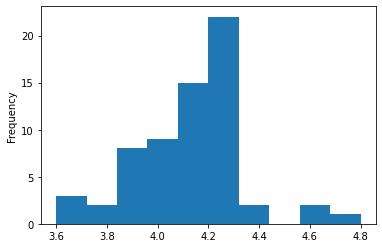

In [ ]:
df_Koramangala['Rating'].plot.hist(bins = 10)

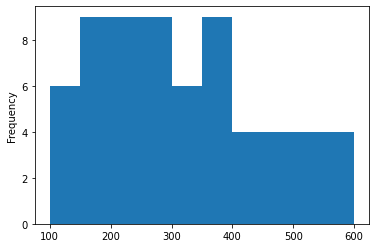

In [ ]:
df_Koramangala['Cost_for_Two (₹)'].plot.hist(bins = 10)

***HSR* *Layout***

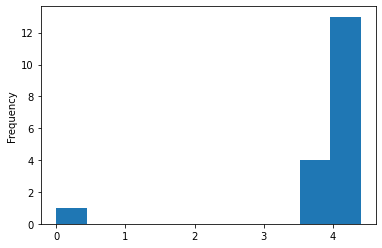

In [ ]:
df_HSR['Rating'].plot.hist(bins = 10)

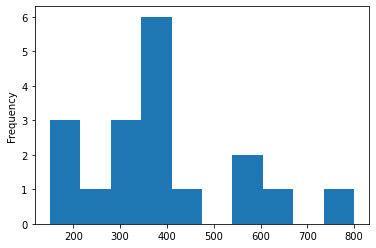

In [ ]:
df_HSR['Cost_for_Two (₹)'].plot.hist(bins = 10)

***BTM Layout***

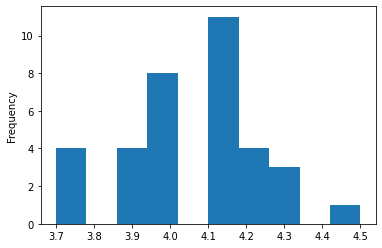

In [ ]:
df_BTM['Rating'].plot.hist(bins = 10)

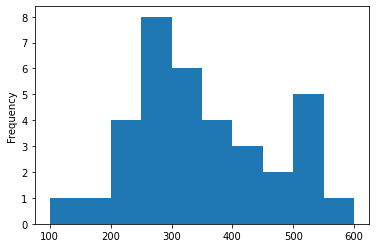

In [ ]:
df_BTM['Cost_for_Two (₹)'].plot.hist(bins = 10)

***Jayanagar***

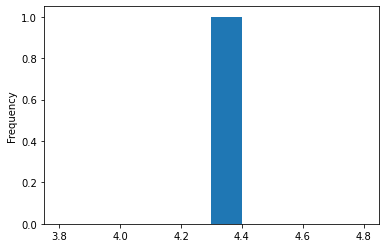

In [ ]:
#Their is only one shop in Jayanagar
df_Jayanagar['Rating'].plot.hist(bins = 10)

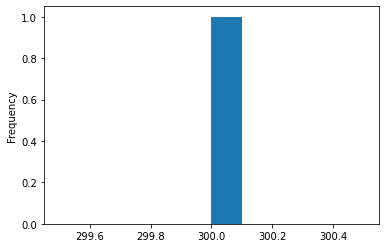

In [ ]:
df_Jayanagar['Cost_for_Two (₹)'].plot.hist(bins = 10)

Koramangala: Most of the Rating is from 4.1 to 4.3, with a maximum cost spent by most of the customers is between ₹150 to ₹380

HSR Layout: Most of the Rating is from 4.0 to 4.5, with a maximum cost spent by most of the customers is between ₹350 to ₹400

BTM Layout: Most of the Rating is from 4.0 to 4.2, with a maximum cost spent by most of the customers is between ₹250 to ₹300

Jayanagar: Most of the Rating is between 4.3 to 4.4, with a maximum cost spent by most of the customers is between ₹300 to ₹350

***From the overall data analysis, we can conclude***

1. HSR Layout has customers who spend the maximum amount on food.
2. Jaynagar's restaurant has the maximum rating.  

